# Particle Swarm Optimization Algorithm (in Python!) 

First of all, let's import the libraries we'll need (remember we are using Python 3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import scipy as sp
# import time


%matplotlib inline
plt.style.use('bmh')


We can define and plot the function we want to optimize:

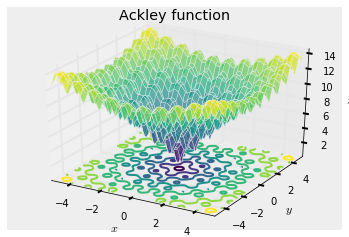

In [2]:
lo_b = -5  # lower bound
up_b = 5   # upper bound


nx_points = 100
ny_points = 100

x = np.linspace(lo_b, up_b, nx_points) # x coordinates of the grid
y = np.linspace(lo_b, up_b, ny_points) # y coordinates of the grid

XX, YY = np.meshgrid(x,y)
ZZ = np.zeros_like(XX)

def f(x):
    '''Ackley n-dimensional function
    x =  numpy array or list containing the independent variables
    
    returns y = objective function value
    '''
    x = np.array(x)  # converts list to numpy array
    n = x.size # n-dimensions of the vector 
    
    y = -20*np.exp(-0.2*(1/n*np.sum(x**2))**0.5) + \
        -np.exp(1/n*np.sum(np.cos(2*np.pi*x))) + 20 + np.exp(1);
        
    return y

for i in range(nx_points):
    for j in range(ny_points):
        ZZ[i,j] = f([XX[i,j], YY[i,j]])
        
# Note: we can have done the same operation by 
# using outer product (aka tensor product)
# instead of the doup_ble loop (see np.outer)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(XX,YY,ZZ,
                rstride=3, cstride=3, alpha=0.7,
                cmap=plt.cm.viridis)

z_proj = ax.contour(XX,YY,ZZ,
                          zdir='z', offset=0,
                          cmap=plt.cm.viridis)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')


ax.set_title('Ackley function')

So we will be using the [Particle Swarm Optimization algorithm](https://en.wikipedia.org/wiki/Particle_swarm_optimization) to obtain the minumum (SPOILER!)
![PSO-2D](img/PSO_Example1.gif)

## PSO Initialization

In [175]:
n_particles = 10
n_iterations = 500

# Initialazing x postion of particles
x_particles = np.random.uniform(lo_b, up_b, size=n_particles)
#x_particles[0] = 0
x_particles_hist = np.zeros((n_iterations, n_particles))
x_particles_hist[0,:] = np.copy(x_particles)

# Initialazing y postion of particles
y_particles = np.random.uniform(lo_b, up_b, size=n_particles)
#y_particles[0] = 0
y_particles_hist = np.zeros((n_iterations, n_particles))
y_particles_hist[0,:] = np.copy(y_particles)

# Initialazing best praticles
x_best_particles = np.copy(x_particles)
y_best_particles = np.copy(y_particles)

z_particles = np.zeros(n_particles)
z_particles_hist = np.zeros((n_iterations, n_particles))

for i in range(n_particles):
    z_particles[i] = f([x_particles[i],y_particles[i]])
        
z_best_global = np.min(z_particles)
index_best_global = np.argmin(z_particles)

x_best_p_global = x_particles[index_best_global]
y_best_p_global = y_particles[index_best_global]

# Initialazin velocity
velocity_lo = lo_b-up_b  # [L/iteration]
velocity_up = up_b-lo_b  # [L/iteration] 

v_max = 0.07 # [L/iteration]

vx_particles = 0.1*np.random.uniform(velocity_lo, velocity_up, size=n_particles)
vx_particles_hist = np.zeros((n_iterations, n_particles))
vx_particles_hist[0,:] = np.copy(vx_particles)

vy_particles = 0.1*np.random.uniform(velocity_lo, velocity_up, size=n_particles)
vy_particles_hist = np.zeros((n_iterations, n_particles))
vy_particles_hist[0,:] = np.copy(vy_particles)


## Visualizing initialization

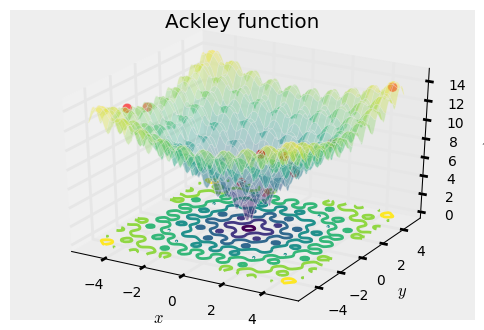

In [176]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(XX,YY,ZZ,
                rstride=3, cstride=3, alpha=0.3,
                cmap=plt.cm.viridis)

z_proj = ax.contour(XX,YY,ZZ,
                          zdir='z', offset=0,
                          cmap=plt.cm.viridis)

ax.scatter(x_particles, y_particles, z_particles,
           s=50, c='r',
           depthshade=True)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')


ax.set_title('Ackley function')



In [177]:
x_best_p_global

1.0688081000716965

## PSO Algorithm

In [178]:
# PSO parameters
#from IPython.core.debugger import Tracer

omega = 0.72    # Inertia weigth
phi_p = 1.49    # particle best weight
phi_g = 1.49    # global global weight

iteration = 1
while iteration <= n_iterations-1:
    for i in range(n_particles):
            x_p = x_particles[i]
            y_p = y_particles[i]
            
            vx_p = vx_particles[i]
            vy_p = vy_particles[i]
            
            x_best_p = x_best_particles[i]
            y_best_p = y_best_particles[i]
            
            r_p = np.random.uniform(0, 1)
            r_g = np.random.uniform(0, 1)
            
            vx_p_new = omega*vx_p + \
                        phi_p*r_p*(x_best_p-x_p) + \
                        phi_g*r_g*(x_best_p_global-x_p)
            
            vy_p_new = omega*vy_p + \
                        phi_p*r_p*(y_best_p-y_p) + \
                        phi_g*r_g*(y_best_p_global-y_p)
            
            # Velocity control
            while not (-v_max <= vx_p_new <= v_max):  
                vx_p_new = 0.9*vx_p_new 
            while not (-v_max <= vy_p_new <= v_max):  
                vy_p_new = 0.9*vy_p_new 
            
            x_p_new = x_p + vx_p_new
            y_p_new = y_p + vy_p_new
            
            # Ignore new position if it's out of the domain
            if not ((lo_b <= x_p_new <= up_b) and (lo_b <= y_p_new <= up_b)): 
                x_p_new = x_p 
                y_p_new = y_p 
            
            x_particles[i] = x_p_new
            y_particles[i] = y_p_new
            
            # Evaluation            
            z_p_new  = f([x_p_new,  y_p_new])
            z_p_best = f([x_best_p, y_best_p])
                                              
            if z_p_new < z_p_best:
                x_best_particles[i] = x_p_new
                y_best_particles[i] = y_p_new
        
                z_p_best_global = f([x_best_p_global, y_best_p_global])
            
                if z_p_new < z_p_best_global:
                    x_best_p_global = x_p_new
                    y_best_p_global = y_p_new
                    
            # Optional: Accumulating values
            x_particles_hist[iteration,i] = x_p_new
            y_particles_hist[iteration,i] = y_p_new
            
            vx_particles_hist[iteration,i] = vx_p_new
            vy_particles_hist[iteration,i] = vy_p_new

            
    iteration = iteration + 1

In [179]:
print(x_best_p_global)
print(y_best_p_global)


-0.00312187334807
0.0884056071093


In [180]:
# vx_particles_hist
# vy_particles_hist
# x_particles
# x_particles_hist
# y_particles_hist

# Animation

In [181]:
from __future__ import print_function
import ipywidgets as widgets

In [182]:
for i in range(n_particles):
    z_particles[i] = f([x_particles[i],y_particles[i]])

In [183]:
def plotPSO(i=0): #iteration
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(XX,YY,ZZ,
                    rstride=3, cstride=3, alpha=0.3,
                    cmap=plt.cm.viridis)

    z_proj = ax.contour(XX,YY,ZZ,
                              zdir='z', offset=0,
                              cmap=plt.cm.viridis)

    ax.scatter(x_particles_hist[i,:], y_particles_hist[i,:], z_particles_hist[i,:],
               s=50, c='r',
               depthshade=True)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')


    ax.set_title('Ackley function')



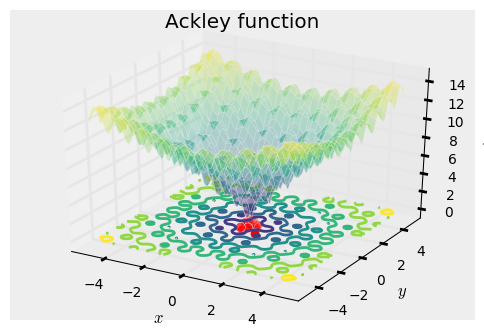

In [184]:
widgets.interact(plotPSO, i=(0,n_iterations-1))